In [10]:
import os
import numpy as np
import seaborn as sns
# add the path of the parent directory to the path
import sys

sys.path.append('../')
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
import helper
import pandas as pd 
ONE_KB=1000
SIM_FEAT_LEN = 5000 # length of one feature in the simulation
SEED = 9999

np.random.seed(SEED)


In [13]:
all_folder='/gladstone/engelhardt/lab/hvu/RNA_rates/data_from_jesse/ha_reorganized_data'
iter=1
gene_name = 'ENSG00000068724'
pred_fn = f'{all_folder}/iter_{iter}/{gene_name}/pred_h.csv.gz'
pred_df = pd.read_csv(pred_fn, header = 0, index_col = None, sep = '\t')
h_breaks = [100, 500, 1000, 2000]
print(pred_df.head())

   start    end    true_h  simpleSmooth  simpleSolver  bayesLinearSolver  \
0  0.000  0.001  4.149722      0.734962      3.697613           3.697613   
1  0.001  0.002  4.149835      0.734962      3.697613           3.697613   
2  0.002  0.003  4.149947      0.734962      3.697613           3.697613   
3  0.003  0.004  4.150060      0.734962      3.697613           3.697613   
4  0.004  0.005  4.150173      0.734962      3.697613           3.697613   

   bayesRBFSolver  logNormalSolver  index  
0             NaN              NaN      0  
1             NaN              NaN      0  
2             NaN              NaN      0  
3             NaN              NaN      0  
4             NaN              NaN      0  


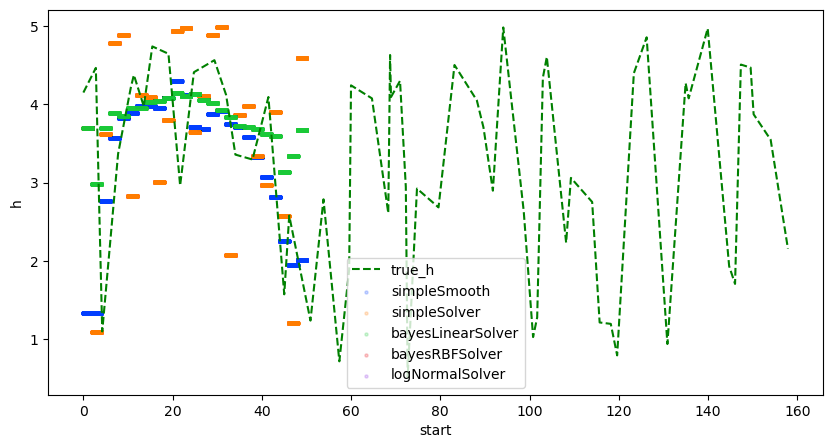

In [25]:
# first, draw the line plot of true_h and start, where index==0
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
index = 3
# get only data with index == 0
plot_df = pred_df[pred_df['index'] == index].copy()
# now, draw the line plot, each line is a different methods (true_h, simpleSmooth, etc.), x axis: start, y axis: h
ax.plot(plot_df['start'], plot_df['true_h'], label='true_h', color='green', linestyle='--', alpha=1)
# color map for different methods
color_map = sns.color_palette("bright", 5)
ax.scatter(plot_df['start'], plot_df['simpleSmooth'], label='simpleSmooth', color=color_map[0], alpha = 0.2, s=5)
ax.scatter(plot_df['start'], plot_df['simpleSolver'], label='simpleSolver', color=color_map[1], alpha = 0.2, s=5)
ax.scatter(plot_df['start'], plot_df['bayesLinearSolver'], label='bayesLinearSolver', color=color_map[2], alpha = 0.2, s=5)
ax.scatter(plot_df['start'], plot_df['bayesRBFSolver'], label='bayesRBFSolver', color=color_map[3], alpha = 0.2, s=5)
ax.scatter(plot_df['start'], plot_df['logNormalSolver'], label='logNormalSolver', color=color_map[4], alpha = 0.2, s=5)
ax.set_xlabel('start')
ax.set_ylabel('h')
ax.legend()
plt.show()

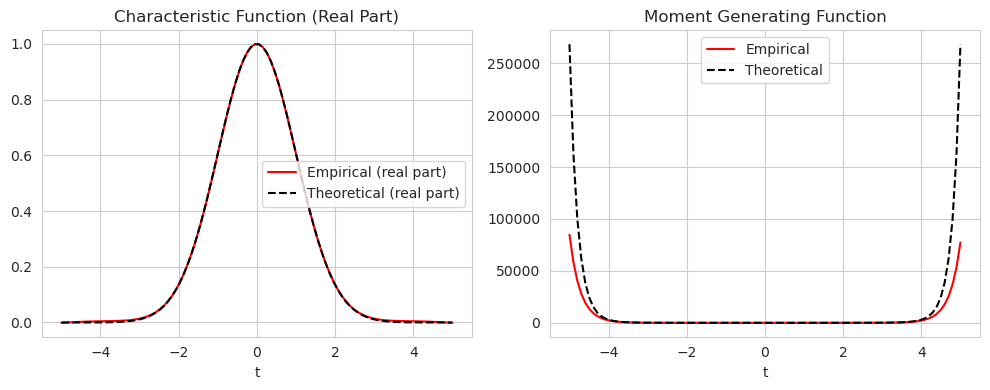

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sample_characteristic_function(data, t_values):
    """
    Approximate the characteristic function E[e^{i t X}] using sample averages.
    """
    # data: a numpy array of observed random variables
    # t_values: array-like of real values for t
    # returns an array of the same length as t_values
    return np.array([np.mean(np.exp(1j * t * data)) for t in t_values])

def sample_mgf(data, t_values):
    """
    Approximate the moment generating function E[e^{t X}] using sample averages.
    """
    return np.array([np.mean(np.exp(t * data)) for t in t_values])

# Generate data
np.random.seed(42)
mu, sigma = 0.0, 1.0
data = np.random.normal(mu, sigma, size=10_000)

# Evaluate CF and MGF on a range of t values
t_values = np.linspace(-5, 5, 100)
cf_est = sample_characteristic_function(data, t_values)
mgf_est = sample_mgf(data, t_values)

# Theoretical CF and MGF for comparison
cf_theoretical = np.exp(1j * mu * t_values - 0.5 * sigma**2 * t_values**2)
mgf_theoretical = np.exp(mu * t_values + 0.5 * sigma**2 * t_values**2)

# Plot real part of characteristic function
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(t_values, cf_est.real, 'r', label='Empirical (real part)')
plt.plot(t_values, cf_theoretical.real, 'k--', label='Theoretical (real part)')
plt.title('Characteristic Function (Real Part)')
plt.xlabel('t')
plt.legend()

# Plot moment generating function
plt.subplot(1,2,2)
plt.plot(t_values, mgf_est, 'r', label='Empirical')
plt.plot(t_values, mgf_theoretical, 'k--', label='Theoretical')
plt.title('Moment Generating Function')
plt.xlabel('t')
plt.legend()

plt.tight_layout()
plt.show()
